In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

In [100]:
path = Path.cwd().parent.parent
filePath = str(path) + "/data_cleanup/train_data_cleaned.parquet"
df = pd.read_parquet(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14824 entries, 0 to 31633
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      14824 non-null  int64         
 1   stay_date           14824 non-null  datetime64[ns]
 2   guest_id            14824 non-null  int64         
 3   guest_country_id    14824 non-null  object        
 4   reservation_status  14824 non-null  object        
 5   reservation_date    14824 non-null  datetime64[ns]
 6   date_from           14824 non-null  datetime64[ns]
 7   date_to             14824 non-null  datetime64[ns]
 8   resort_id           14824 non-null  int64         
 9   cancel_date         2764 non-null   object        
 10  room_cnt            14824 non-null  int64         
 11  adult_cnt           14824 non-null  int64         
 12  children_cnt        14824 non-null  int64         
 13  price               12845 non-null  float64       


In [101]:
df.head()

,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,cancel_date,...,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night
0,73710,2007-12-13,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,None,...,452.089,4564.690,265.428,26.572,43.800,0.000,3,10.0,2.0,2127.731
2,74464,2008-01-01,106278,HR,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,None,...,3806.147,19764.823,530.929,53.071,14897.037,3319.383,4,4.0,1.0,4336.857
3,74461,2008-01-01,38936,GB,Cancelled,2007-12-29,2008-01-01,2008-01-02,1,2008-01-01,...,1012.948,10392.280,1592.714,159.286,262.800,0.000,5,3.0,1.0,8536.766
4,74466,2008-01-01,106279,HR,Cancelled,2007-12-29,2008-01-01,2008-01-03,1,2007-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,6,4.0,2.0,NaN
6,74470,2008-01-01,38936,GB,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,None,...,1012.948,10392.280,1592.714,159.286,262.800,0.000,4,3.0,1.0,8536.766


In [102]:
df['children_cnt'].head()

0    0
2    0
3    0
4    0
6    0
Name: children_cnt, dtype: int64

In [103]:
df['children_cnt'].unique()

array([0, 1])

Analiza po statusu rezervacije

In [104]:
df['reservation_status'].unique()

array(['Checked-out', 'Cancelled', 'No-show'], dtype=object)

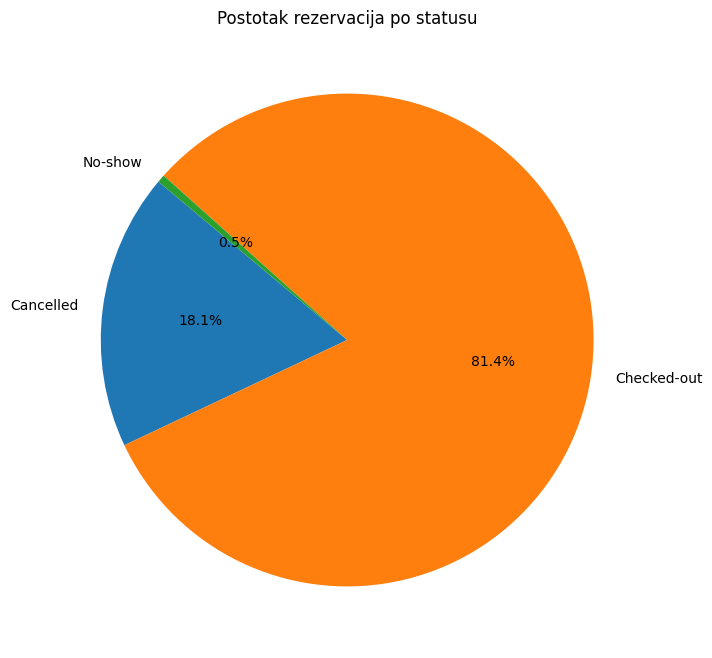

In [105]:
frekvencija_po_statusu = df['reservation_status'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_statusu, labels=frekvencija_po_statusu.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po statusu')
plt.show()

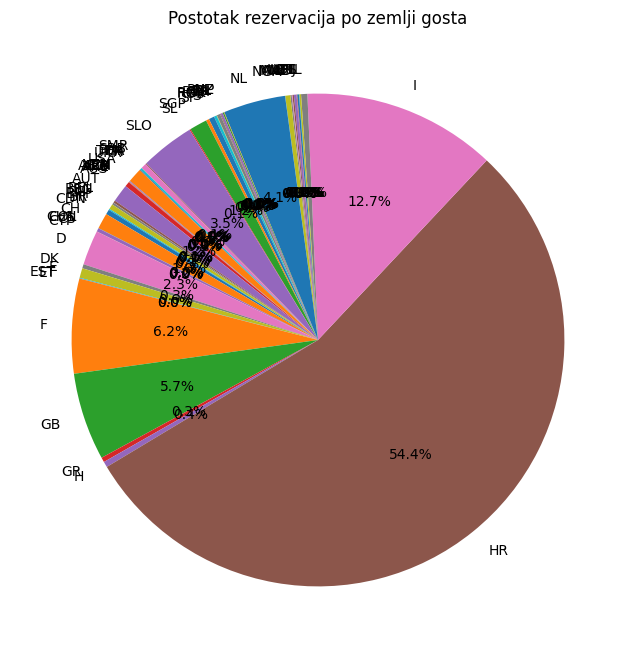

In [106]:
frekvencija_po_zemlji = df['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

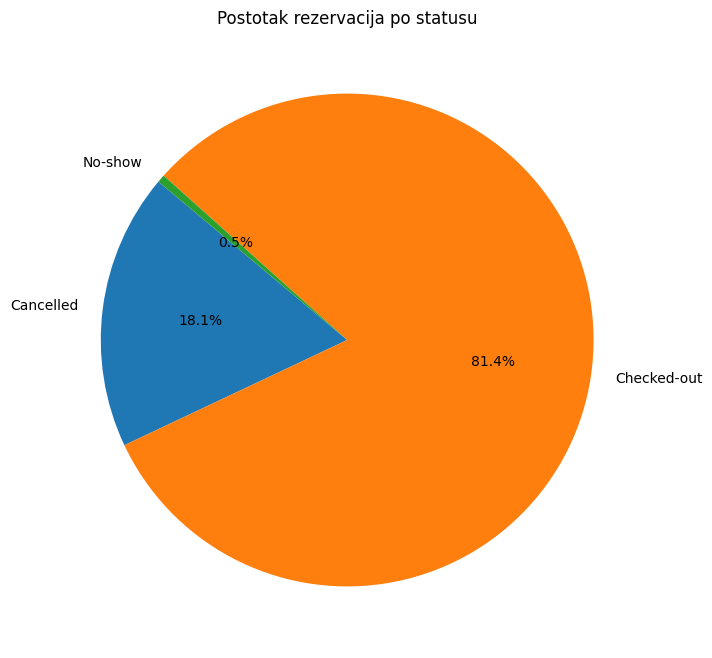

In [107]:
frekvencija_po_statusu = df['reservation_status'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_statusu, labels=frekvencija_po_statusu.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po statusu')
plt.show()

In [108]:
df['resort_id'].unique

<bound method Series.unique of 0        1
2        1
3        1
4        1
6        1
        ..
31627    1
31630    1
31631    1
31632    1
31633    1
Name: resort_id, Length: 14824, dtype: int64>

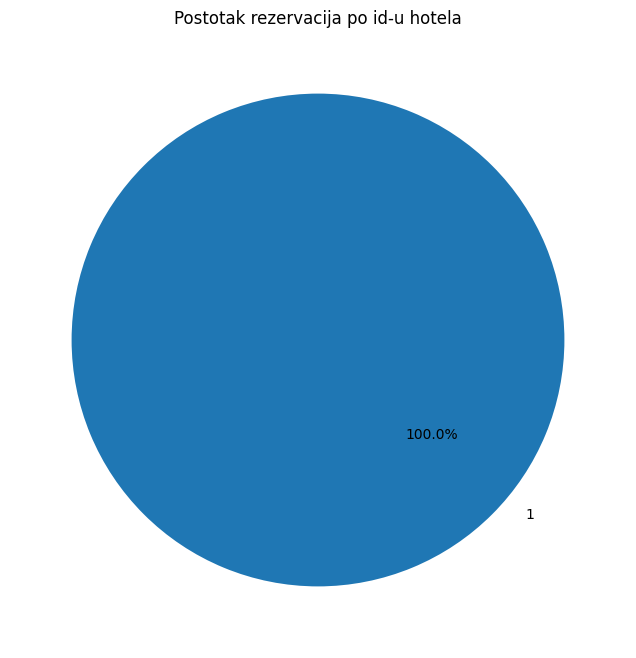

In [109]:
frekvencija_po_hotel_id = df['resort_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_hotel_id, labels=frekvencija_po_hotel_id.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po id-u hotela')
plt.show()

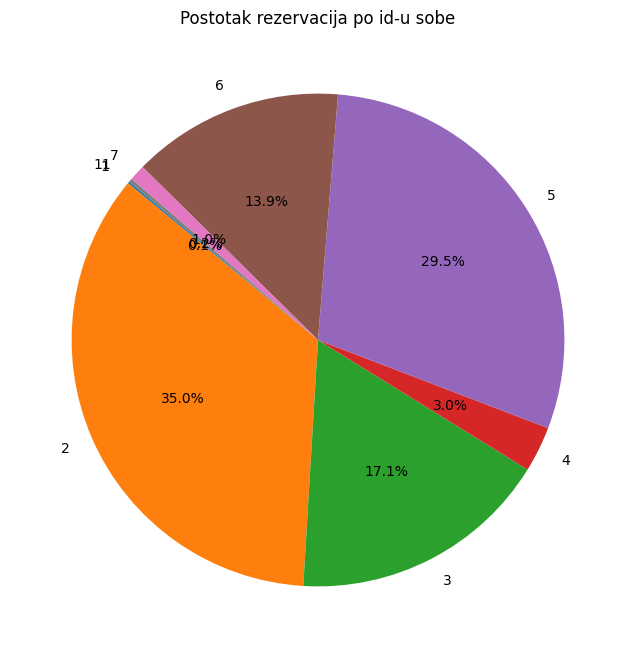

In [110]:
frekvencija_po_soba_id = df['room_category_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_soba_id, labels=frekvencija_po_soba_id.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po id-u sobe')
plt.show()

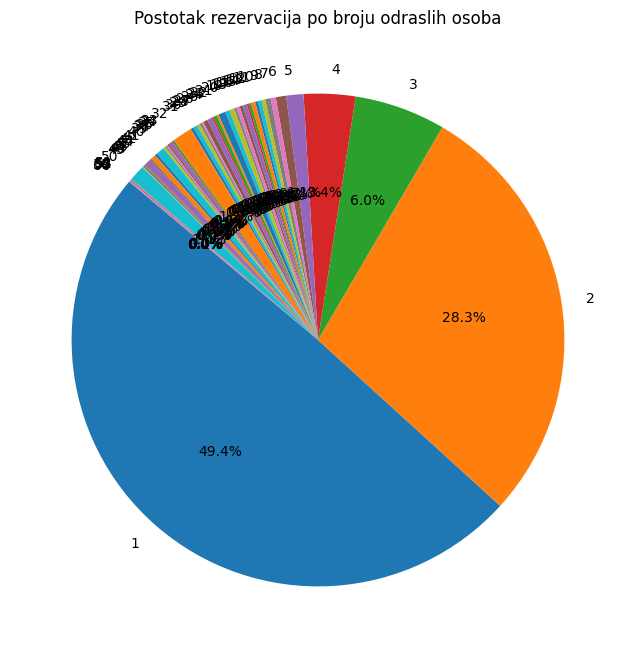

In [111]:
frekvencija_po_odraslim = df['adult_cnt'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_odraslim, labels=frekvencija_po_odraslim.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po broju odraslih osoba')
plt.show()

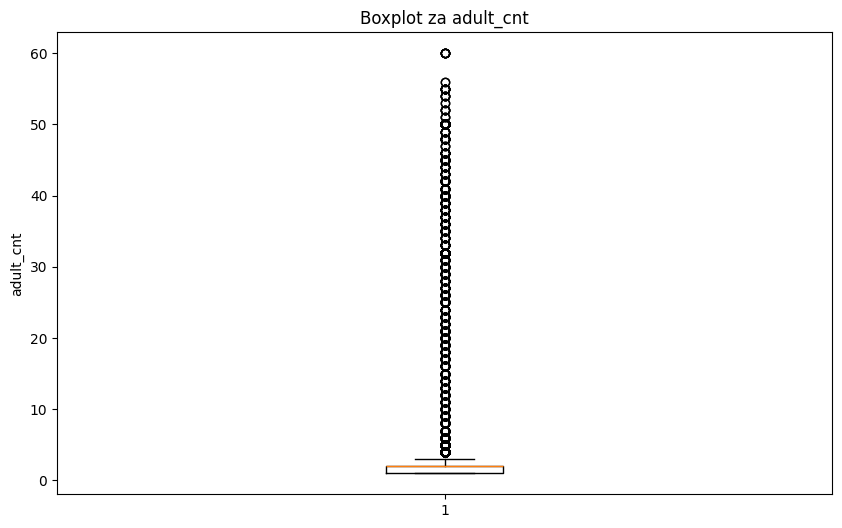

In [112]:
plt.figure(figsize=(10, 6)) 
plt.boxplot(df['adult_cnt'])
plt.title('Boxplot za adult_cnt')
plt.ylabel('adult_cnt')
plt.show()

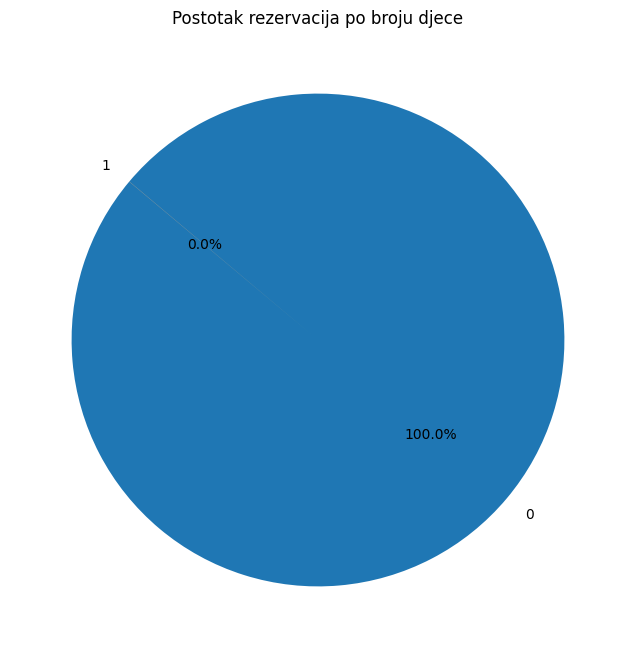

In [113]:
frekvencija_po_djeci = df['children_cnt'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_djeci, labels=frekvencija_po_djeci.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po broju djece')
plt.show()

In [114]:
frekvencija_po_djeci.head()

children_cnt
0    14823
1        1
Name: count, dtype: int64

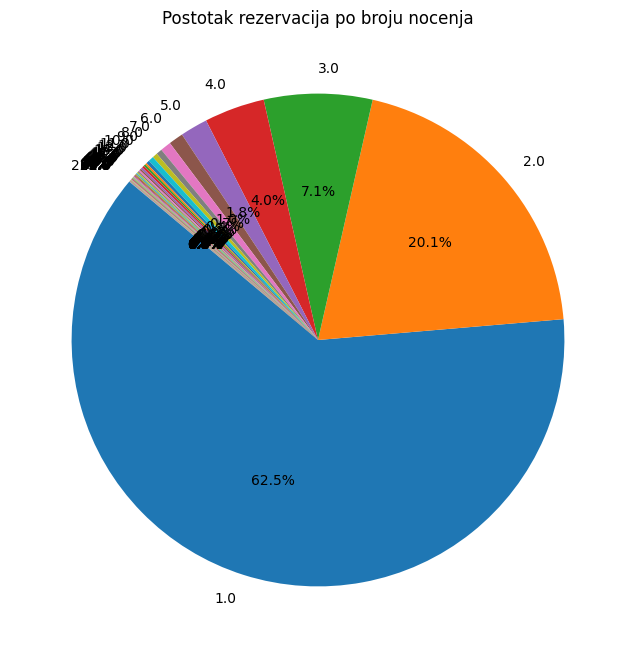

In [115]:
frekvencija_po_broju_nocenja = df['stay_nights'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_nocenja, labels=frekvencija_po_broju_nocenja.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po broju nocenja')
plt.show()

In [116]:
df['stay_nights'].max()

226.0

In [117]:
df['stay_nights'].min()

1.0

In [118]:
df['stay_nights'].mean()

2.097072315164598

In [119]:
df["reservation_status"].unique()

array(['Checked-out', 'Cancelled', 'No-show'], dtype=object)

In [133]:
pd.set_option('display.max_rows', )
pd.set_option('display.max_columns', None)

In [139]:
df_low_price = df[df['price_per_night'] >=4000]
df_low_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5239 entries, 2 to 31627
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      5239 non-null   int64         
 1   stay_date           5239 non-null   datetime64[ns]
 2   guest_id            5239 non-null   int64         
 3   guest_country_id    5239 non-null   object        
 4   reservation_status  5239 non-null   object        
 5   reservation_date    5239 non-null   datetime64[ns]
 6   date_from           5239 non-null   datetime64[ns]
 7   date_to             5239 non-null   datetime64[ns]
 8   resort_id           5239 non-null   int64         
 9   cancel_date         0 non-null      object        
 10  room_cnt            5239 non-null   int64         
 11  adult_cnt           5239 non-null   int64         
 12  children_cnt        5239 non-null   int64         
 13  price               5239 non-null   float64       
 

In [124]:
df = df[df['reservation_status'] == 'Checked-out']

In [125]:
df.describe()

,reservation_id,stay_date,guest_id,reservation_date,date_from,date_to,resort_id,room_cnt,adult_cnt,children_cnt,...,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night
count,12060.000000,12060,12060.000000,12060,12060,12060,12060.0,12060.000000,12060.000000,12060.000000,...,12060.000000,12060.000000,11948.000000,11948.000000,11948.000000,11948.000000,12060.000000,12060.000000,12060.000000,11948.000000
mean,82803.398259,2008-12-26 07:50:48.358208768,73882.089801,2008-12-14 10:32:14.328358400,2008-12-26 07:50:48.358208768,2008-12-28 09:52:07.164178944,1.0,1.943781,2.704478,0.000083,...,1258.195197,13115.971815,1119.747842,111.952635,1879.167835,134.327725,3.674129,5.194279,2.084245,7337.076914
min,68240.000000,2007-12-13 00:00:00,104.000000,2007-05-23 00:00:00,2007-12-13 00:00:00,2007-12-15 00:00:00,1.0,1.000000,1.000000,0.000000,...,0.000000,33.270000,9.090000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.030000
25%,78596.500000,2008-07-03 00:00:00,29370.000000,2008-06-17 00:00:00,2008-07-03 00:00:00,2008-07-04 00:00:00,1.0,1.000000,1.000000,0.000000,...,103.190000,1092.205000,85.450000,8.550000,21.000000,0.000000,2.000000,3.000000,1.000000,816.360000
50%,82914.500000,2008-12-13 00:00:00,81445.000000,2008-12-03 00:00:00,2008-12-13 00:00:00,2008-12-17 00:00:00,1.0,1.000000,1.000000,0.000000,...,472.821000,4825.300000,311.929000,31.171000,102.200000,0.000000,3.000000,3.000000,1.000000,2775.788500
75%,87023.250000,2009-06-25 06:00:00,110818.750000,2009-06-13 00:00:00,2009-06-25 06:00:00,2009-06-28 00:00:00,1.0,1.000000,2.000000,0.000000,...,1164.350000,12397.863750,935.787000,93.586000,751.900000,13.090000,5.000000,10.000000,2.000000,6679.646000
max,91366.000000,2009-12-31 00:00:00,149866.000000,2009-12-31 00:00:00,2009-12-31 00:00:00,2010-01-16 00:00:00,1.0,50.000000,56.000000,1.000000,...,42805.375000,370963.954000,27447.051000,2745.749000,70290.021000,11374.203000,11.000000,18.000000,226.000000,248166.639000
std,4919.873141,NaN,42172.540901,NaN,NaN,NaN,0.0,3.403898,5.552953,0.009106,...,2578.609457,26729.797948,2627.978353,262.858567,6082.587726,521.672929,1.621220,3.481626,3.929286,15735.011024


In [121]:
df['stay_nights'].median()

1.0

In [122]:
df_clean = df.dropna(subset=['price_per_night'])

In [123]:


# Izračunajte IQR
Q1 = df_clean['price_per_night'].quantile(0.25)
Q3 = df_clean['price_per_night'].quantile(0.75)
IQR = Q3 - Q1

# Broj promatranja
n = len(df_clean)

# Izračunajte širinu binova prema Freedman-Diaconis pravilu
bin_width = 2 * IQR * (n ** (-1/3))

# Izračunajte ukupan broj binova
bin_number = round((df_clean['price_per_night'].max() - df_clean['price_per_night'].min()) / bin_width)

# Izrada histograma
plt.figure(figsize=(10, 6))
plt.hist(df_clean['price_per_night'], bins=bin_number, density=True, edgecolor='black')
plt.title('Histogram cijena po noćenju s prilagođenim binovima')
plt.xlabel('Cijena po noćenju')
plt.ylabel('Gustoća')
plt.grid(axis='y', alpha=0.75)

plt.show()

TypeError: 'numpy.float64' object is not callable

In [ ]:
filtered_data = df[(df['price_per_night'] > Q1) & (df['price_per_night'] < Q3)]
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['price_per_night'], bins=10, density=True, edgecolor='black')  # 'auto' može koristiti internu logiku za određivanje broja binova
plt.title('Histogram cijena po noćenju (samo 25%-75% kvantil)')
plt.xlabel('Cijena po noćenju')
plt.ylabel('Gustoća')
plt.grid(axis='y', alpha=0.75)

# Prikazujemo grafikon
plt.show()

#visine u grafikonu prikazuju relativnu frekvenicju svakog intervala cijene podijeljenu sa duljinom tog interavala

In [ ]:
filtered_data['price_per_night'].max()-filtered_data['price_per_night'].min()

In [ ]:
len = filtered_data['price_per_night'].max()-filtered_data['price_per_night'].min()
bin_width = 100
bin_number = round(len / bin_width)
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['price_per_night'], bins=bin_number, density=True, edgecolor='black')  # 'auto' može koristiti internu logiku za određivanje broja binova
plt.title('Histogram cijena po noćenju (samo 25%-75% kvantil)')
plt.xlabel('Cijena po noćenju')
plt.ylabel('Gustoća')
plt.grid(axis='y', alpha=0.75)

# Prikazujemo grafikon
plt.show()

In [ ]:
df_clean_total_price = df.dropna(subset=['total_price'])

In [ ]:
filtered_data_total_price['total_price'].max()-filtered_data_total_price['total_price'].min()

In [ ]:
len = df_clean_total_price['total_price'].max()-df_clean_total_price['total_price'].min()
bin_width = 10000
bin_number = round(len / bin_width)
plt.figure(figsize=(10, 6))
plt.hist(df_clean_total_price['total_price'], bins=bin_number, density=True, edgecolor='black')  
plt.title('Histogram ukupne cijene')
plt.xlabel('Cijena')
plt.ylabel('Relativna frekvencija/bin_width')
plt.grid(axis='y', alpha=0.75)

# Prikazujemo grafikon
plt.show()

In [ ]:
len = filtered_data_total_price['total_price'].max()-filtered_data_total_price['total_price'].min()
bin_width = 100
bin_number = round(len / bin_width)
plt.figure(figsize=(10, 6))
plt.hist(filtered_data_total_price['total_price'], bins=bin_number, density=True, edgecolor='black')  
plt.title('Histogram ukupne cijene (samo 25%-75% kvantil)')
plt.xlabel('Cijena')
plt.ylabel('Relativna frekvencija/bin_width')
plt.grid(axis='y', alpha=0.75)

# Prikazujemo grafikon
plt.show()

In [ ]:
filtered_data_total_price = df[(df['total_price'] > Q1) & (df['total_price'] < Q3)]

In [141]:
df_sigle_person = df[df['adult_cnt']==1]

In [142]:
df_sigle_person.describe()

,reservation_id,stay_date,guest_id,reservation_date,date_from,date_to,resort_id,room_cnt,adult_cnt,children_cnt,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night
count,6401.000000,6401,6401.000000,6401,6401,6401,6401.0,6401.000000,6401.0,6401.0,6308.000000,6308.000000,6401.000000,6401.000000,6308.000000,6308.000000,6308.000000,6308.000000,6401.000000,6401.000000,6401.000000,6308.000000
mean,82948.472582,2008-12-25 14:40:57.740978176,66657.635057,2008-12-20 14:28:35.356975360,2008-12-25 14:40:57.740978176,2008-12-28 00:32:10.198406400,1.0,1.000312,1.0,0.0,8454.320177,845.393479,990.679212,10232.372930,718.605776,71.814997,1191.702446,86.423457,3.038588,5.552882,2.410561,5230.238517
min,73606.000000,2007-12-13 00:00:00,104.000000,2007-11-23 00:00:00,2007-12-13 00:00:00,2007-12-15 00:00:00,1.0,1.000000,1.0,0.0,18.180000,1.820000,2.730000,33.270000,9.090000,0.910000,0.000000,0.000000,1.000000,1.000000,1.000000,3.030000
25%,78556.000000,2008-06-21 00:00:00,23589.000000,2008-06-14 00:00:00,2008-06-21 00:00:00,2008-06-24 00:00:00,1.0,1.000000,1.0,0.0,816.360000,81.640000,85.910000,866.090000,42.730000,4.270000,14.000000,0.000000,2.000000,3.000000,1.000000,616.360000
50%,83112.000000,2008-12-16 00:00:00,64913.000000,2008-12-13 00:00:00,2008-12-16 00:00:00,2008-12-18 00:00:00,1.0,1.000000,1.0,0.0,4328.498500,432.853500,465.667000,4722.662000,311.929000,31.171000,51.100000,0.000000,2.000000,4.000000,1.000000,2162.333000
75%,87084.000000,2009-06-18 00:00:00,106493.000000,2009-06-16 00:00:00,2009-06-18 00:00:00,2009-06-20 00:00:00,1.0,1.000000,1.0,0.0,8129.353000,811.139500,913.011000,9454.522000,623.858000,62.342000,683.207000,18.765000,3.000000,10.000000,2.000000,4689.498100
max,91338.000000,2009-12-30 00:00:00,149866.000000,2009-12-29 00:00:00,2009-12-30 00:00:00,2010-01-16 00:00:00,1.0,2.000000,1.0,0.0,291252.334000,29124.445000,42805.375000,370963.954000,24641.369000,2463.531000,58076.683000,11374.203000,11.000000,18.000000,81.000000,247873.690000
std,4912.289469,NaN,42731.080103,NaN,NaN,NaN,0.0,0.017675,0.0,0.0,14687.251666,1468.720733,1772.821876,18136.964086,1320.994567,132.038491,2962.766982,302.631048,1.393930,3.606555,4.135310,10428.952242
